In [196]:
import numpy as np
import nltk
import gensim
import re
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pprint

# Topic modeling



<img src="https://www.depends-on-the-definition.com/wp-content/uploads/2018/11/IntroToLDA.png" alt="topic_modeling" style="width: 620px;"/>

In [197]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [198]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [199]:
with open('wiki_lingvo.txt', mode='r', encoding='utf-8') as file:
    text = file.readlines()

In [200]:
len(text)

2000

In [201]:
text[0]

'<p><b>Leipon</b>, or <b>Pityilu</b>, is an Austronesian language spoken on Hauwai, Ndrilo, and Pityilu islands, just off Manus Island in Papua New Guinea. </p>\n'

In [202]:
#delete html tags
clear_text = [BeautifulSoup(t, 'lxml').text for t in text]

In [203]:
clear_text[4]

"Judeo-Yemeni Arabic (also known as Judeo-Yemeni and Yemenite Judeo-Arabic) is a variety of Arabic spoken by Jews living or formerly living in Yemen. The language is quite different from mainstream Yemeni Arabic, and is written in the Hebrew alphabet. The cities of Sana'a, Aden, al-Bayda, and Habban District and the villages in their districts each have (or had) their own dialect.The vast majority of Yemenite Jews have relocated to Israel and have shifted to Modern Hebrew as their first language. In 1995, Israel was home to 50,000 speakers of Judeo-Yemeni in 1995, while 1,000 remained in Yemen.  According to Yemeni rabbi al-Marhabi, most of these have since left for the United States. As of  2010, fewer than 300 Jews were believed to remain in Yemen.\n"

#### Tokenization

In [204]:
from nltk import word_tokenize

In [205]:
tokens = [word_tokenize(t) for t in clear_text]

In [206]:
tokens[0]

['Leipon',
 ',',
 'or',
 'Pityilu',
 ',',
 'is',
 'an',
 'Austronesian',
 'language',
 'spoken',
 'on',
 'Hauwai',
 ',',
 'Ndrilo',
 ',',
 'and',
 'Pityilu',
 'islands',
 ',',
 'just',
 'off',
 'Manus',
 'Island',
 'in',
 'Papua',
 'New',
 'Guinea',
 '.']

In [207]:
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokens], threshold=10)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [222]:
#bigram_mod[tokens[3]]

#### Lemmatization

In [209]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def process_words(texts):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    for sent in texts:
        texts_out.append([wnl.lemmatize(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(tokens)  # processed Text Data!

In [210]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [211]:
id2word[0]

'austronesian'

#### LDA model

In [223]:
#help(gensim.models.ldamodel.LdaModel)

In [213]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto', #symmetric, assymetric
                                           iterations=100,
                                           per_word_topics=True)

#quick view on topic words
lda_model.print_topics()

[(0,
  '0.027*"used" + 0.027*"word" + 0.013*"based" + 0.007*"term" + 0.007*"vowel" + 0.007*"set" + 0.007*"example" + 0.007*"often" + 0.007*"two" + 0.006*"common"'),
 (1,
  '0.018*"new" + 0.015*"language_spoken" + 0.014*"system" + 0.013*"island" + 0.012*"sign" + 0.012*"script" + 0.011*"called" + 0.011*"letter" + 0.009*"developed" + 0.008*"like"'),
 (2,
  '0.018*"armenian" + 0.013*"country" + 0.013*"lisp" + 0.012*"spanish" + 0.010*"software" + 0.009*"sanskrit" + 0.008*"wrote" + 0.008*"period" + 0.008*"russian" + 0.007*"shtokavian"'),
 (3,
  '0.104*"language" + 0.026*"dialect" + 0.020*"spoken" + 0.009*"south" + 0.008*"group" + 0.008*"western" + 0.008*"one" + 0.008*"two" + 0.008*"speaker" + 0.007*"name"'),
 (4,
  '0.017*"university" + 0.015*"english" + 0.010*"linguist" + 0.009*"born" + 0.009*"first" + 0.008*"work" + 0.008*"time" + 0.008*"french" + 0.008*"text" + 0.008*"professor"'),
 (5,
  '0.024*"film" + 0.020*"people" + 0.016*"known" + 0.013*"written" + 0.012*"southern" + 0.012*"turkish"

Words frequency distribution

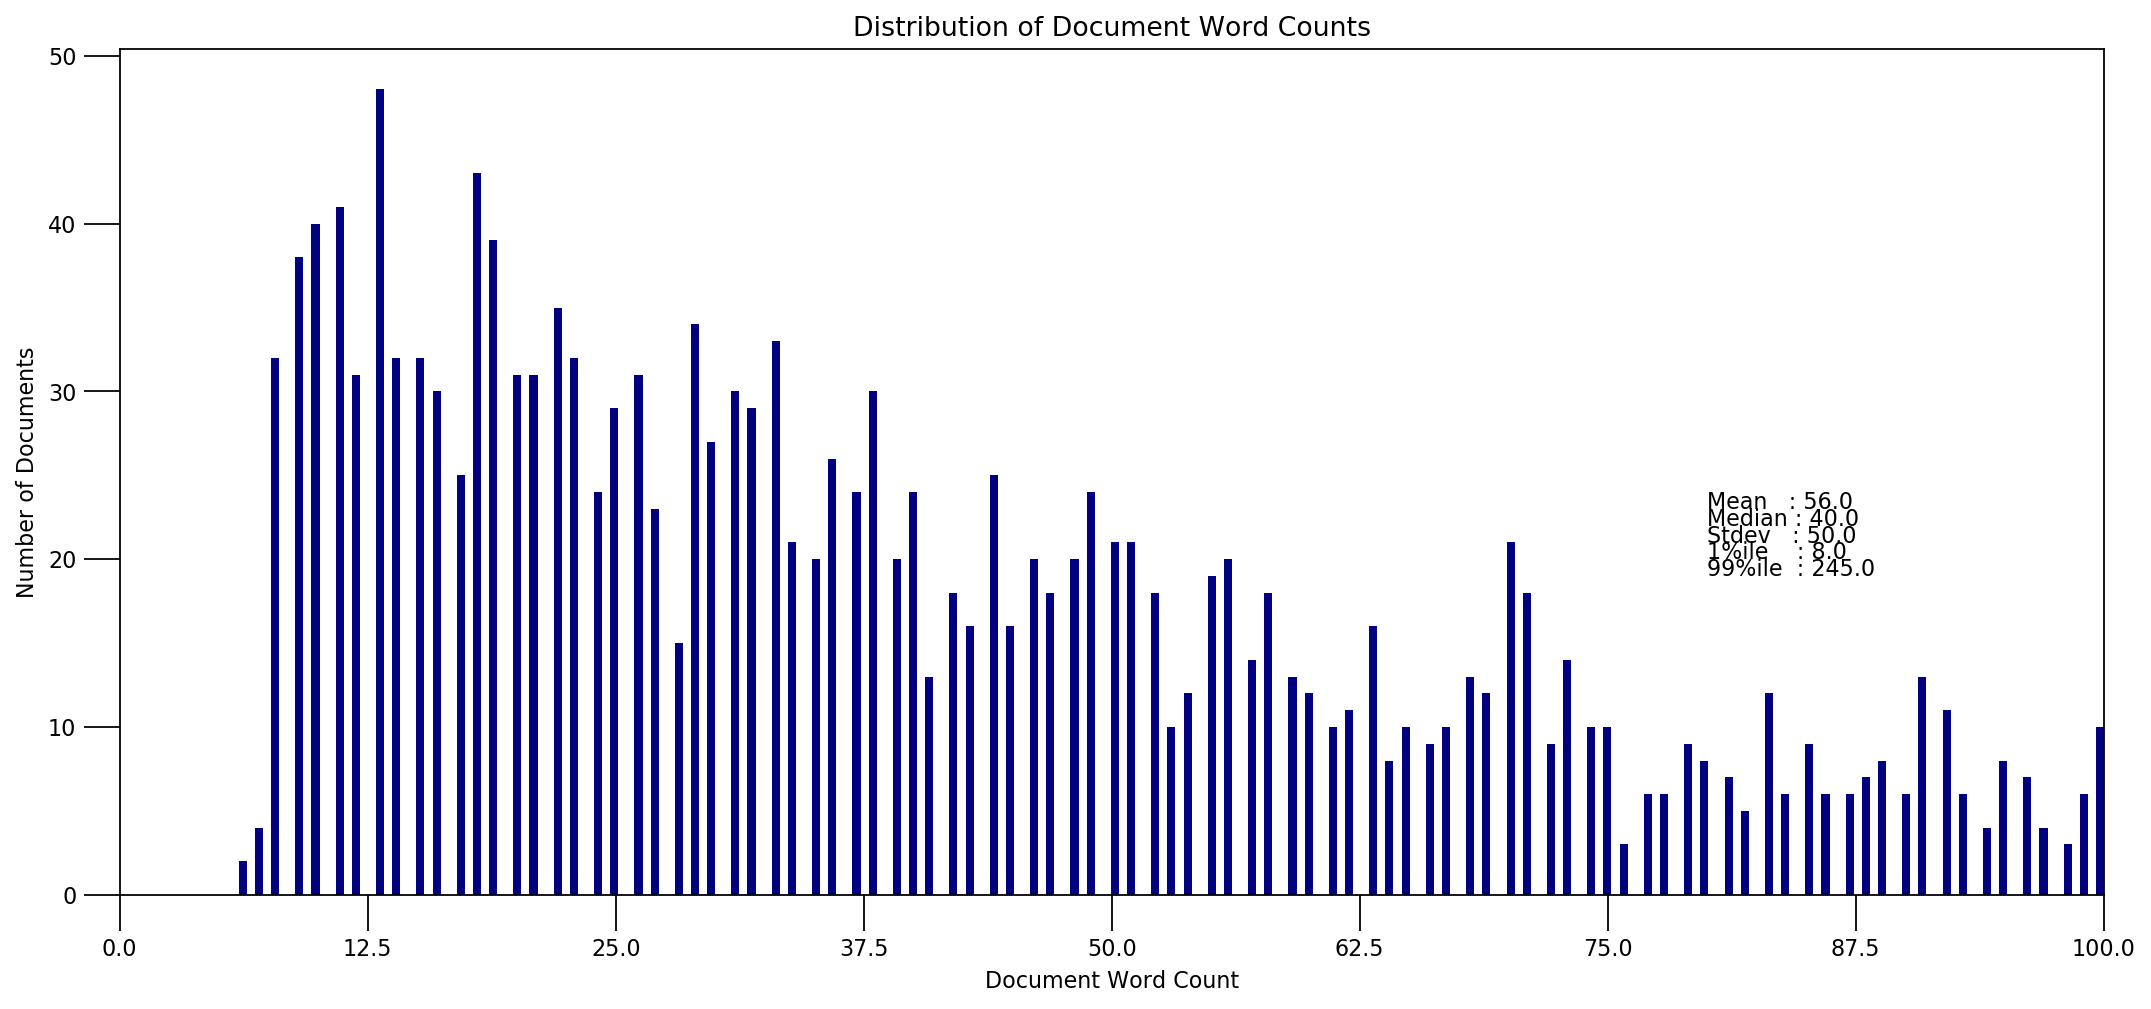

In [214]:
doc_lens = [len(d) for d in data_ready]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts')


plt.text(80, 23, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(80,  22, "Median : " + str(round(np.median(doc_lens))))
plt.text(80,  21, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(80,  20, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(80,  19, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.show()

In [215]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = {}
for i, topic in topics:
    if i  not in out:
        out[i] = {'word': [], 'importance': [], 'word_count': []}
    for word, weight in topic:
        out[i]["word"].append(word)
        out[i]["importance"].append(weight)
        out[i]["word_count"].append(counter[word])

Visualization of the most important words for every topic

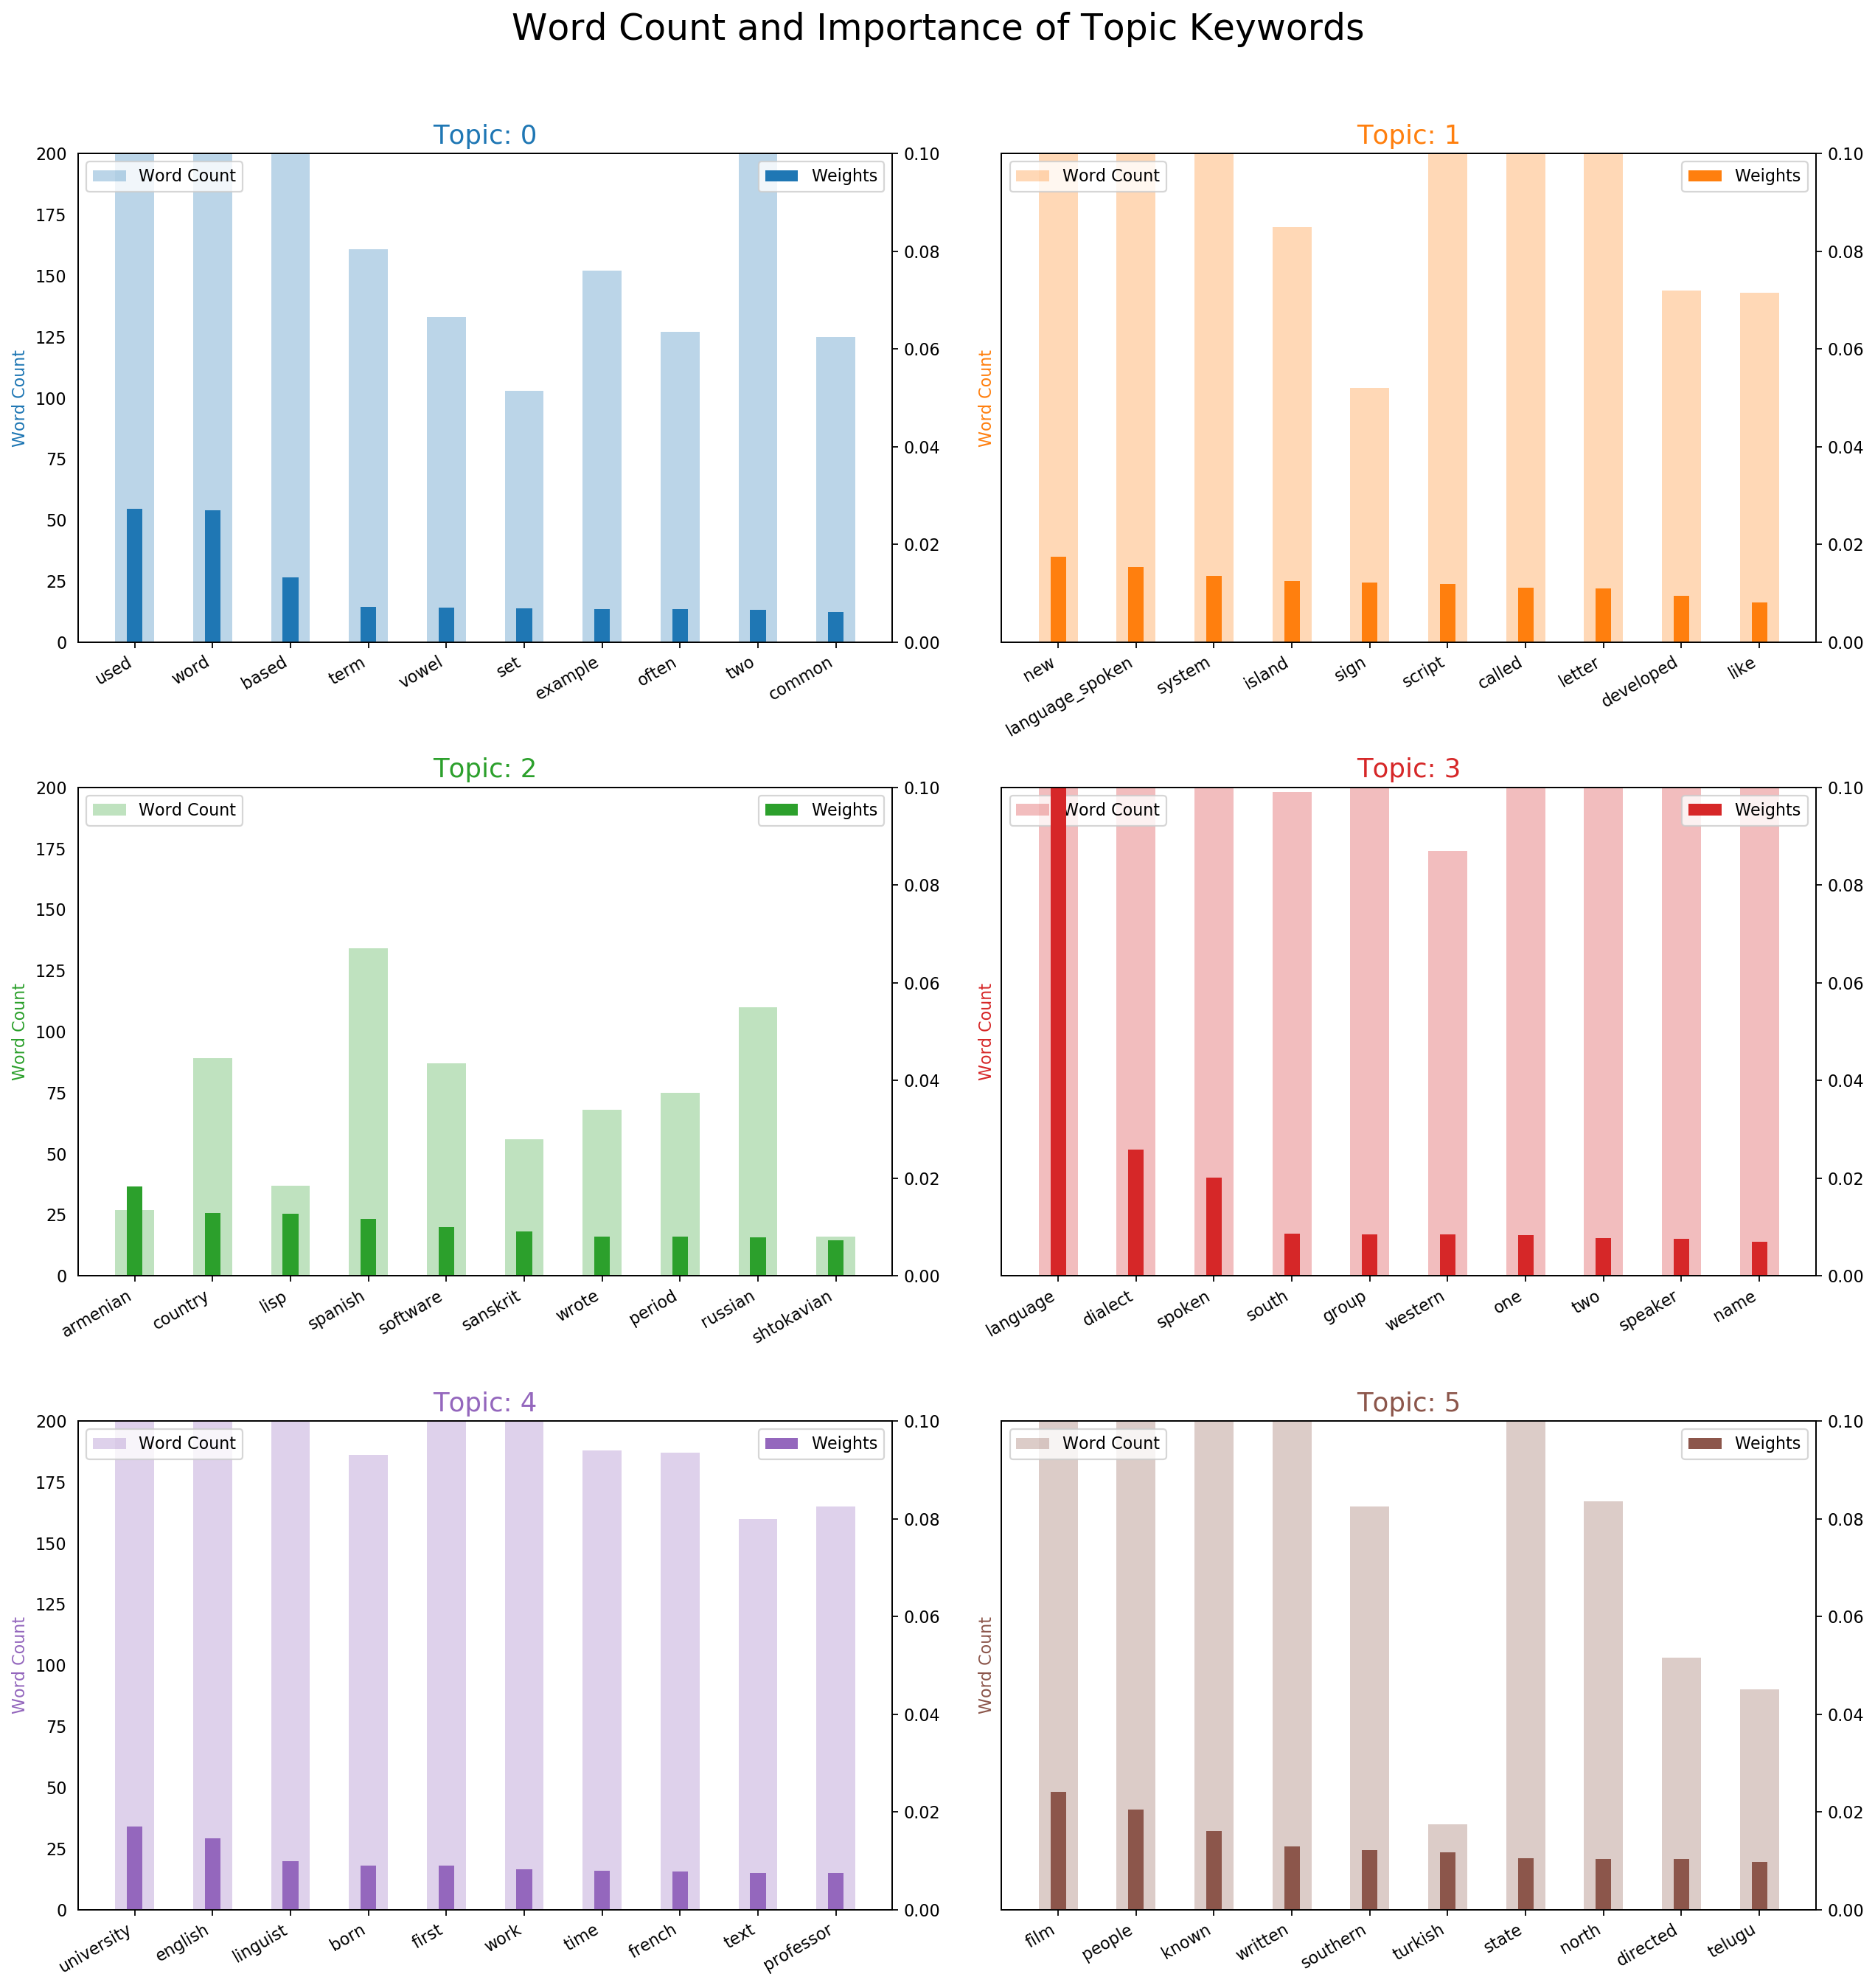

In [216]:
import matplotlib.colors as mcolors

fig, axes = plt.subplots(3, 2, figsize=(16,16), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=out[i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=out[i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 200)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

#### Sentence coloring

In [217]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1 + start) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1), 
                 fontsize=22, y=0.97, fontweight=700)
    plt.tight_layout()
    plt.show()

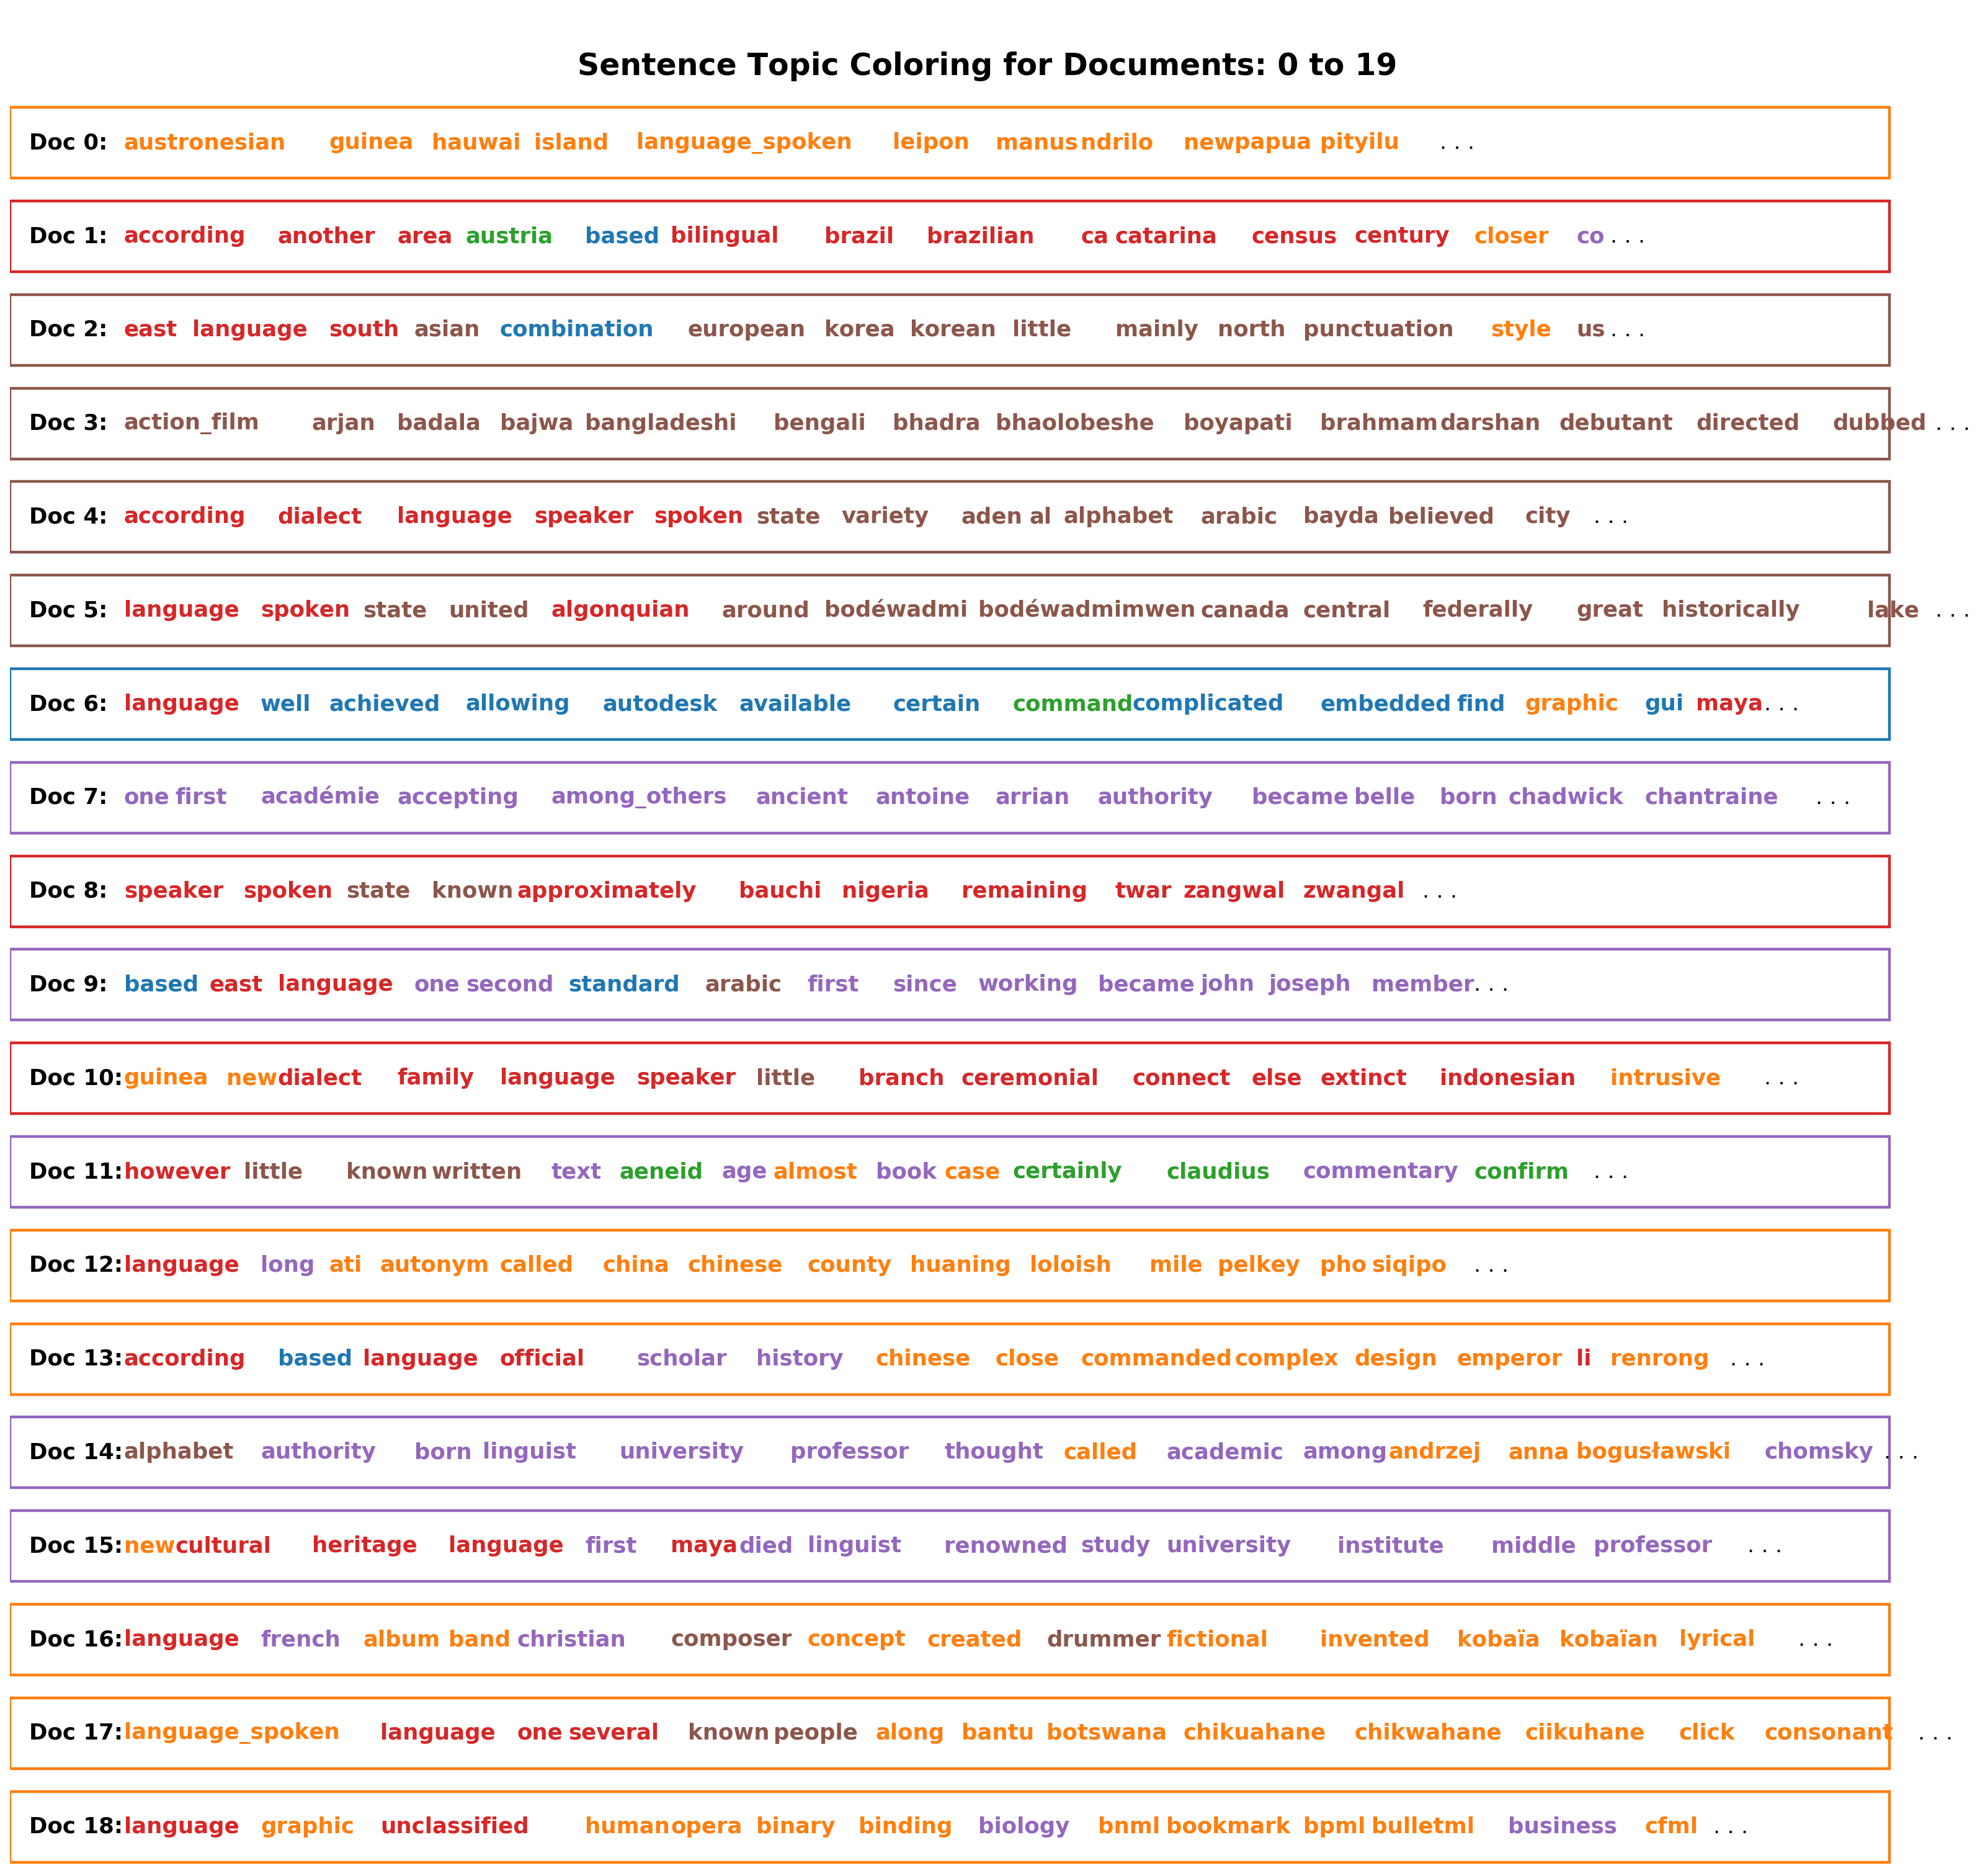

In [218]:
sentences_chart(start=0, end=20)  

#### Visualization

In [221]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

D:\Python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.300821 -0.099279       1        1  27.256706
4     -0.164575 -0.266325       2        1  22.784914
0      0.026002  0.074964       3        1  15.869612
5     -0.084248  0.120281       4        1  14.052732
1     -0.029298  0.129644       5        1  14.033421
2     -0.048703  0.040715       6        1   6.002616, topic_info=     Category         Freq      Term        Total  loglift  logprob
53    Default  3280.000000  language  3280.000000  30.0000  30.0000
29    Default   789.000000   dialect   789.000000  29.0000  29.0000
251   Default   486.000000      used   486.000000  28.0000  28.0000
783   Default   480.000000      word   480.000000  27.0000  27.0000
86    Default   617.000000    spoken   617.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
4943   Topic6    22.520044      site    23.361197   2.7763  -5.7012
2018   Topic6    22.306021   instead    23.141617   2.7762  -5.7107
3315   Topic6    32.631973   prakrit    33.855133   2.7762  -5.3303
484    Topic6    33.103062     roman    41.213921   2.5938  -5.3160
22     Topic6    30.292835   century   229.083130   0.7898  -5.4047

[235 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1397      1  0.996257    africa
614       5  0.996356     along
162       4  0.989834  alphabet
337       2  0.990673  although
562       2  0.997331  american
...     ...       ...       ...
783       3  0.999366      word
491       2  0.998098      work
525       5  0.991154   writing
196       4  0.997409   written
492       6  0.985986     wrote

[226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 6, 2, 3])